In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gid=40



Sample = h5py.File('../micFile/Ti7FFT.hdf5')

orig = Sample["origin"][:]
step = Sample["stepSize"][:]


GIDLayer=Sample["GrainID"][:].astype(int)
tmpx=np.arange(orig[0],step[0]*GIDLayer.shape[0]+orig[0],step[0])
tmpy=np.arange(orig[1],step[1]*GIDLayer.shape[1]+orig[1],step[1])
xv,yv=np.meshgrid(tmpx,tmpy)
idx=np.where(GIDLayer==gid)
x=xv[idx]
y=yv[idx]

tmpE11 = Sample["E11"][:][idx]
tmpE12 = Sample["E12"][:][idx]
tmpE13 = Sample["E13"][:][idx]
tmpE22 = Sample["E22"][:][idx]
tmpE23 = Sample["E23"][:][idx]
tmpE33 = Sample["E33"][:][idx]



ss=np.zeros((len(x),3,3))
ss[:,0,0]=tmpE11+1
ss[:,0,1]=tmpE12
ss[:,0,2]=tmpE13
ss[:,1,0]=ss[:,0,1]
ss[:,2,0]=ss[:,0,2]
ss[:,1,1]=tmpE22+1
ss[:,1,2]=tmpE23
ss[:,2,1]=ss[:,1,2]
ss[:,2,2]=tmpE33+1

with h5py.File("../RecResult/grain_{:02d}_rec.hdf5".format(gid),"r") as f:
    Phase2_S=f['Phase2_S'][:]
    recX=f['x'][:]
    recY=f['y'][:]
    realS=f['realS'][:]
    realO=f['realO'][:]
    


In [3]:
xidx=((x-np.min(x))/0.002).astype(int)
yidx=((y-np.min(y))/0.002).astype(int)
ssMap=np.zeros((np.max(yidx)+1,np.max(xidx)+1,3,3))+np.min(ss,axis=0)-0.001
realSMap=np.zeros((np.max(yidx)+1,np.max(xidx)+1,3,3))+np.min(ss,axis=0)-0.001

for ii in range(len(xidx)):
    ssMap[yidx[ii],xidx[ii],:,:]=ss[ii]
    

xidx=((recX-np.min(x))/0.002).astype(int)
yidx=((recY-np.min(y))/0.002).astype(int)

for ii in range(len(xidx)):
    realSMap[yidx[ii],xidx[ii],:,:]=realS[ii]
    

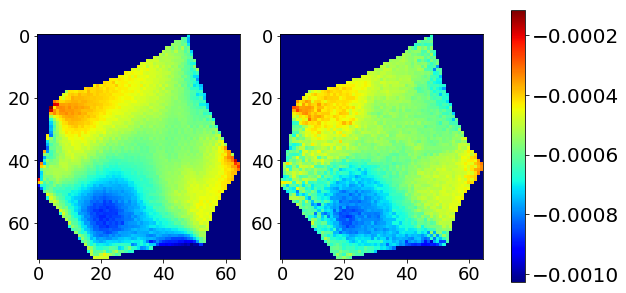

In [16]:
i=0
j=1
recRes=realSMap[:,:,i,j]-int(i==j)
groundTruth=ssMap[:,:,i,j]-int(i==j)
vmin=np.min(ss[:,i,j])-int(i==j)
vmax=np.max(ss[:,i,j])-int(i==j)

fig,ax = plt.subplots(1,2,figsize = (10,5))
im=ax[0].imshow(groundTruth,origin='upper',cmap='jet',vmax=vmax,vmin=vmin)
ax[1].imshow(recRes,origin='upper',cmap='jet',vmin=vmin,vmax=vmax)

for ii in range(2):
    ax[ii].xaxis.set_major_locator(plt.MaxNLocator(4))
    ax[ii].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[ii].xaxis.set_tick_params(labelsize=18)
    ax[ii].yaxis.set_tick_params(labelsize=18)

cbar=fig.colorbar(im, ax=ax.ravel().tolist())
cbar.ax.tick_params(labelsize=20) 

plt.show()